In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [2]:
df = pd.read_csv(r"E:\NLP_based\tweets\cyberbullying_tweets.csv")

In [3]:
df.head()

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying


In [4]:
df['cyberbullying_type'].value_counts()

religion               7998
age                    7992
gender                 7973
ethnicity              7961
not_cyberbullying      7945
other_cyberbullying    7823
Name: cyberbullying_type, dtype: int64

<AxesSubplot:xlabel='cyberbullying_type', ylabel='count'>

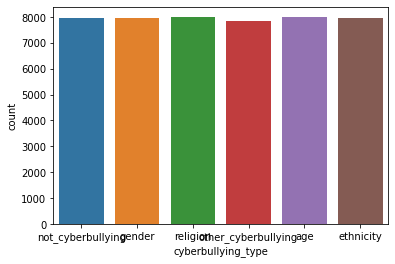

In [5]:
sns.countplot(x='cyberbullying_type',data=df)

In [6]:
import re
def  clean_text(df, text_field):
    df[text_field] = df[text_field].str.lower()
    df[text_field] = df[text_field].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", elem))  
    return df
df_clean = clean_text(df, "tweet_text")

In [8]:
xfeatures  = df_clean['tweet_text']
ylabels = df_clean['cyberbullying_type']

In [9]:
x_train,x_test,y_train,y_test = train_test_split(xfeatures,ylabels, test_size=0.3, random_state=42)

In [10]:
from sklearn.pipeline import Pipeline
pipe_lr= Pipeline(steps=[('cv',CountVectorizer()),('lr',LogisticRegression())])
pipe_lr.fit(x_train,y_train)

c:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [11]:
pipe_lr.score(x_test,y_test)

0.8178641319541515

In [13]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
train_vectors = vectorizer.fit_transform(x_train)
test_vectors = vectorizer.transform(x_test)
print(train_vectors.shape, test_vectors.shape)

(33384, 40713) (14308, 40713)


In [14]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(train_vectors, y_train)

In [15]:
clf.score(test_vectors,y_test)

0.7113502935420744

In [31]:
ex = " finally left school, no more childhood bullies, starting a new page, couldve been a lot better"

In [32]:
pipe_lr.predict([ex])

array(['age'], dtype=object)

In [33]:
pipe_lr.predict_proba([ex])

array([[9.84630838e-01, 1.78818876e-04, 2.79008682e-04, 1.17317213e-02,
        2.97031511e-03, 2.09298505e-04]])

In [27]:
pipe_lr.classes_

array(['age', 'ethnicity', 'gender', 'not_cyberbullying',
       'other_cyberbullying', 'religion'], dtype=object)

In [35]:
# save model and pipeline
import joblib
pipeline_file =  open("cyber_text_classiication_pipe_lr.pkl","wb")
joblib.dump(pipe_lr,pipeline_file)
pipeline_file.close()